# Exploring the Relationship Between the Meta Scores of Films and the Reviews of the General Audiance for Films After the 1970s?


## Introduction:
IMDB is an online database of information related to films, television series, podcasts, and other forms of entertainment content. For our project we will be working specifically with movie (film) data from IMDB. This database presents data regarding several aspects of the content - including cast, production crew, plot summary, and scores. IMDB presents two kinds of scores; IMDB scores which are user-generated, meaning they are an average of reviews submitted on the IMDB website by non-critic viewers, and Meta Scores which are critic-generated, meaning they are an average of reviews from critics, professionals who analyze films. 

For our project we will try to answer the following question:
"How accurate are the Meta Scores of films in representing the general interest of the viewers for films after 1970?"

The dataset presented is from Kaggle, and includes data from the top 1000 movies based on the IMDB score from the IMBD online database. The dataset includes the following columns:
* Series_Title: the name of the film
* Released_year: year it was released
* Certificate: certificate earned by the movie
* Runtime: total runtime
* Genre: list of genres the film falls into
* IMDB_Rating: the IMDB rating given by IMDB user reviews
* Overview: plot summary
* Meta_score: meta score of the movie determined by omvie critics
* Director: name of the director of the movie
* Star1, Star2, Star3, Star4: names of the stars of the movie in order of significance
* No_of_votes: number of reviews on IMDB
* Gross: how much money the movie earned
In summary, this project will determine if meta scores are an accurate predictor of audience reception of a movie using the Meta_score and IMDB_Rating columns respectively.

Dataset Origin: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
### Initialize. 
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(dplyr)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
### Reading from Github
url <- "https://github.com/anh-dong/dsci-100-2023w1-group-33/blob/main/data/imdb_top_1000.csv?raw=true"
movies_raw <- read_csv(url)

Rows: 1000 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Ge...
dbl  (3): IMDB_Rating, Meta_score, No_of_Votes
num  (1): Gross

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
### Table Summary
movies <- movies_raw |>
    select(Meta_score, IMDB_Rating, Released_Year) |>
    filter(Released_Year > 1970) |>
    mutate(Meta_score = round(scale(Meta_score), 0), IMDB_Rating = round(scale(IMDB_Rating), 0))

movies_table_Meta_scores <- movies |>
    group_by(Meta_score) |>
    summarize(Meta_score_count = n()) |>
    rename(normalized_value = Meta_score)


movies_table_IMDB_Rating <- movies |>
    group_by(IMDB_Rating) |>
    summarize(IMDB_Rating_count = n()) |>
    rename(normalized_value = IMDB_Rating)

joined <- left_join(movies_table_Meta_scores, movies_table_IMDB_Rating) |>
    mutate(IMDB_Rating_count = replace(IMDB_Rating_count, is.na(IMDB_Rating_count), 0))
joined

Joining with `by = join_by(normalized_value)`


normalized_value,Meta_score_count,IMDB_Rating_count
"<dbl[,1]>",<int>,<dbl>
-4,3,0
-3,8,0
-2,46,0
-1,146,248
0,250,310
1,209,173
2,36,51
NA,100,0


Warning message:
“Removed 100 rows containing non-finite values (`stat_bin()`).”


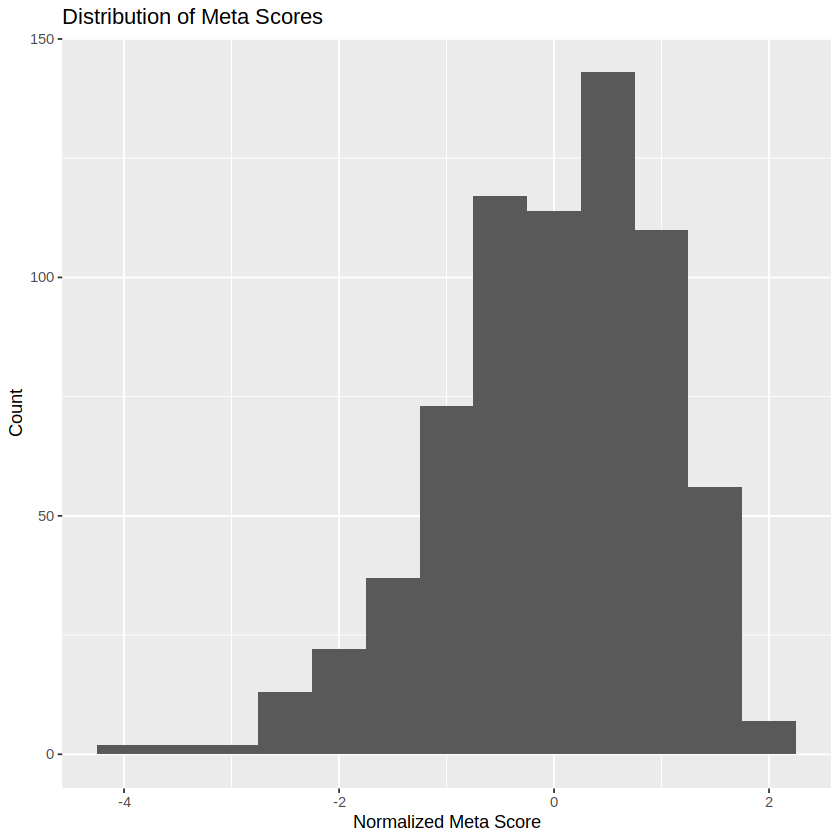

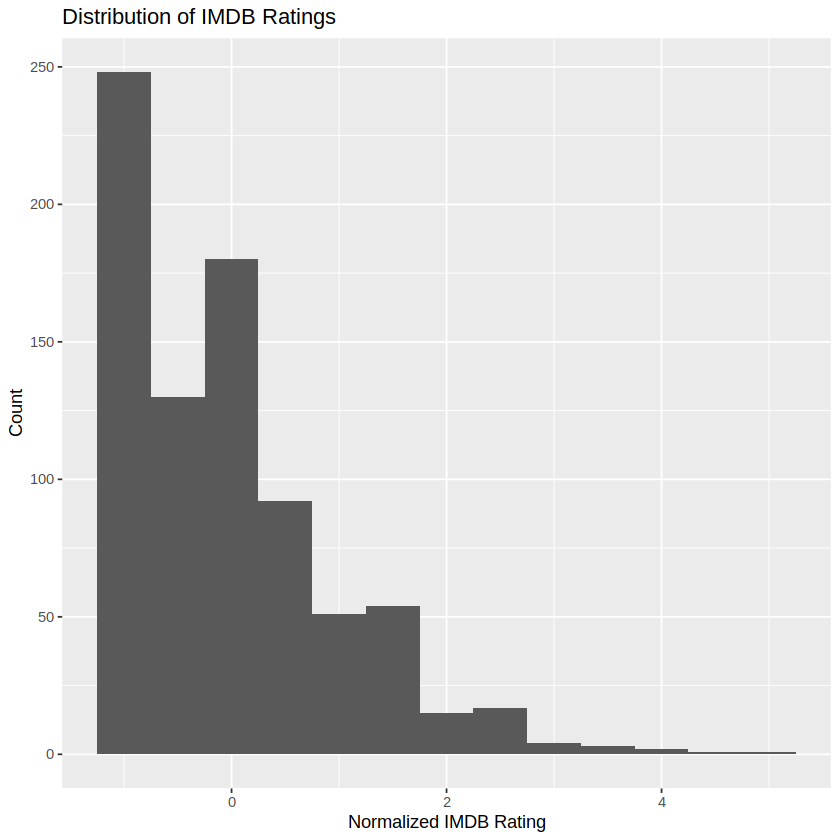

In [4]:
### Summary Visual
movies <- movies_raw |>
    select(Meta_score, IMDB_Rating, Released_Year) |>
    filter(Released_Year > 1970) |>
    mutate(Meta_score = scale(Meta_score), IMDB_Rating = scale(IMDB_Rating))

Meta_score_hist <- movies |>
    ggplot(aes(Meta_score)) +
        geom_histogram(binwidth = 0.5) +
        xlab("Normalized Meta Score") +
        ylab("Count") +
        ggtitle("Distribution of Meta Scores")
Meta_score_hist

IMDB_Review_hist <- movies |>
    ggplot(aes(IMDB_Rating)) +
        geom_histogram(binwidth = 0.5) +
        xlab("Normalized IMDB Rating") +
        ylab("Count") +
        ggtitle("Distribution of IMDB Ratings")
IMDB_Review_hist

## Methods:



## Expected Outcomes and Significance:
Our prediction is that that the Meta Scores will be weakly proportional to each other. This is expected because in general, critics are trying to give audiences an accurate expectation on the film based on their ratings so they should correlate positively with each other. However, the critics producing the meta scores would likely focus on more creative minute details such as creative decisions to determine a given rating, while general audiences reviews would be more skewed towards the overall content and how entertaining the film was, suggesting that there will not be a strong relationship between the two variables.